# Known Variable Stars in the RGES Galactic Bulge Survey Region

The Roman Galactic Exoplanet Survey will intensively monitor stars in the central Galactic Bulge, and so will produce extensive timeseries photometry for not just microlensing events, but also a wide range of variable stars.  In order to accurately identify microlensing events from these data we need to develop algorithms to distinguish events from variable stars. The purpose of this work is to compile a training dataset of variable star lightcurves which can be used in the development and testing of the classification algorithm.  

The first step towards building this training dataset is to compile a set of lightcurves of known variable stars identified during previous surveys of this region.  These can then be used as templates and resampled to produce realistic Roman lightcurve for the same objects.  

In [1]:
from os import getcwd, path
import sys
sys.path.append("..")
import json
import utils

In [2]:
DATA_DIR = path.join(getcwd(), '../data/')

## Identifying and cross-matching known variables within the region of interest

A number of pre-existing surveys have published catalogs of known variable stars discovered within the Galactic Plane and Bulge, including the OGLE and VVV microlensing surveys. Since these are very large source catalogs, served from different platforms, it is 
most convenient to extract the subset of these catalogs pertaining to the region of interest before cross-matching the entries.  

Two programs in this library query OGLE and VVV survey datasets respectively, both of which can be run from the commandline:

python identify_known_ogle_variables.py path_to_output_directory
python identify_known_vvv_variables.py path_to_output_directory

Both programs search the survey data catalogs included in the data/ directory of this repository for reference.  More information on those catalogs can be found in the [data/README](https://github.com/rges-pit/variable_catalog_xmatch/blob/main/data/README.md) file.  

The output of these programs are two sub-catalogs of known variables within the survey region in JSON format.

**These catalogs are then cross-matched and combined into a single catalog of variables within the survey region of interest, [data/rges_variable_catalog.json](https://github.com/rges-pit/variable_catalog_xmatch/blob/main/data/rges_variable_catalog.json).**

In [3]:
var_catalog_file = path.join(DATA_DIR, 'rges_variable_catalog.json')

var_catalog = utils.load_json_catalog_as_table(var_catalog_file)
var_catalog

Loaded 195687 entries from catalog rges_variable_catalog.json


Name,Type,RA,Dec
str20,str16,float64,float64
OGLE-BLG-LPV-023363,lpv,265.9569166666666,-33.408722222222224
OGLE-BLG-LPV-023560,lpv,265.97475,-33.46183333333334
OGLE-BLG-LPV-023841,lpv,265.9956666666666,-33.544333333333334
OGLE-BLG-LPV-023890,lpv,265.99954166666663,-33.665166666666664
OGLE-BLG-LPV-024065,lpv,266.0117083333333,-33.53033333333333
OGLE-BLG-LPV-024175,lpv,266.0205416666667,-33.593500000000006
OGLE-BLG-LPV-024223,lpv,266.0242916666666,-33.47094444444445
OGLE-BLG-LPV-024308,lpv,266.03070833333334,-33.36761111111111
OGLE-BLG-LPV-024492,lpv,266.043875,-33.58130555555556


## Identifying UKIRT data on known variables

The UKIRT microlensing survey observed the Galactic Bulge contemporaneously with OGLE, and produced higher cadence photometry 
in NIR passbands than VVV.  A catalog of microlensing events identified within the data was published, but no independent 
catalog of variables.  However, since the timeseries photometry of all stars in the field of view was released, we can use the input catalog of known variables produced above to identify data on variable objects.  

The first step in this process is to cross-match the rges_variable_catalog.json with the UKIRT catalog to identify those stars for which photometry is available.  This is non-trival, due to the very large size of the full photometry dataset, so those data are not included in this repository but can be accessed from the NASA Exoplanet Database. This library includes the program ```identify_variables_in_UKIRT_survey.py``` which is designed to query the UKIRT timeseries dataset held separately on local disk.  
The programs ```index_ukirt_lightcurves.py``` and ```build_ukirt_field_lut.py``` were written to accelerate the process of searching the data holdings and retrieving the appropriate lightcurves. 

**As a result, the data/rges_variable_catalog.json is annotated with the information necessary to retrieve the UKIRT lightcurve data, where available.**

In [4]:
var_catalog_file = path.join(DATA_DIR, 'rges_variable_catalog.json')

var_catalog = utils.load_json_catalog(var_catalog_file)

# Output the catalog entries for a set of example stars known to be present in both OGLE and UKIRT
star_list = ['OGLE-BLG-LPV-079181', 'OGLE-BLG-LPV-064575', 'OGLE-BLG-LPV-070503']
for star_id in star_list:
    print(var_catalog[star_id])

{'Type': 'lpv', 'RA': 267.96662499999996, 'Dec': -29.182444444444446, 'VVV_ID': None, 'VVV_type': None, 'UKIRT_source_table': ['UKIRT_year2016_field72_ccd1_md.tbl'], 'UKIRT_lc_files': [{'sourceid': 'ukirt_c_2016_s_72_1_0062202', 'year': '2016', 'bulge': 's', 'field': '72', 'ccdid': '1'}]}
{'Type': 'lpv', 'RA': 267.6444583333333, 'Dec': -29.33497222222222, 'VVV_ID': None, 'VVV_type': None, 'UKIRT_source_table': ['UKIRT_year2016_field71_ccd1_md.tbl'], 'UKIRT_lc_files': [{'sourceid': 'ukirt_c_2016_s_71_1_0009811', 'year': '2016', 'bulge': 's', 'field': '71', 'ccdid': '1'}]}
{'Type': 'lpv', 'RA': 267.78524999999996, 'Dec': -29.336222222222222, 'VVV_ID': None, 'VVV_type': None, 'UKIRT_source_table': ['UKIRT_year2016_field71_ccd1_md.tbl'], 'UKIRT_lc_files': [{'sourceid': 'ukirt_c_2016_s_71_1_0009369', 'year': '2016', 'bulge': 's', 'field': '71', 'ccdid': '1'}]}


## Retrieving optical and NIR timeseries photometry

The program compile_lightcurves.py reads in the rges_variable_catalog.json and compiles the available optical and NIR timeseries photometry from OGLE and UKIRT.  The OGLE photometry is retrieved on a per-object basis from OGLE's online server, while the UKIRT photometry is retrieved from a copy of the survey data products on local disk. 

**A single, combined lightcurve file is produced for each star in FITS binary table format, containing multiple table extensions, one for each lightcurve in the available passbands.**  

These extensions may include one or more of OGLE (I-band), OGLE (V-band), UKIRT (H-band), UKIRT (K-band).  Note that since the UKIRT survey spanned multiple years with overlapping survey fields, multiple H and K-band lightcurves may exist for the same star.  These are included as separate table extensions, indexed numerically.  

In [5]:
LC_DIR = path.join(getcwd(), '../../multiband_lightcurves/')

# Load the lightcurve data for an example star 
file_path = path.join(LC_DIR, 'OGLE-BLG-RRLYR-22182_multiband_lc.fits')

header, lightcurves = utils.load_multiband_lc(file_path)

The lightcurve header contains information about the available data, and the source of the lightcurves:

In [6]:
for key, value in header.items():
    print(key + ': ' + repr(value))

SIMPLE: True
BITPIX: 8
NAXIS: 0
EXTEND: True
NAME: 'OGLE-BLG-RRLYR-22182'
RA: 263.9697499999999
DEC: -29.734805555555557
VARTYPE: 'rrlyrae'
NDATA_I: 898
NDATA_V: 21
NDATA_H0: 143
VSOURCE: 'OGLE'
ISOURCE: 'OGLE'
HSOURCE: 'UKIRT'
KSOURCE: 'UKIRT'


And the collated lightcurves are returned as a dictionary of Astropy Tables, with an entry for each passband:

In [7]:
for lc_name, lc in lightcurves.items():
    print(lc_name)
    print(lc)

LIGHTCURVE_I
     HJD       mag   mag_error
------------- ------ ---------
2455288.86467  17.47     0.016
2455293.82944  18.03     0.021
2455294.81492 17.363     0.011
2455296.85738 17.885     0.015
2455298.92816 17.869     0.026
2455301.84345  17.74     0.017
2455306.77822 17.765     0.017
 2455308.7952 17.782     0.016
2455312.92902 17.779      0.02
2455314.90351 17.979     0.023
          ...    ...       ...
2457972.52595 17.938     0.037
2457972.56482 18.065     0.038
 2457972.6192 18.006      0.03
2457972.66691 18.084     0.033
2457972.72221 17.888     0.027
2457973.54133 18.047     0.038
2457973.66637 17.597      0.02
  2457974.531 18.019     0.021
2457974.64683 17.496     0.015
2457975.47643 18.044     0.031
Length = 898 rows
LIGHTCURVE_V
     HJD       mag   mag_error
------------- ------ ---------
2455288.84473 20.354     0.097
2455643.84784 21.485     0.207
2455737.68685 20.366     0.033
2455991.88303 20.416     0.044
2456023.88343 21.231     0.141
2456102.61404  20.46     0

Plotting this lightcurve as an example...

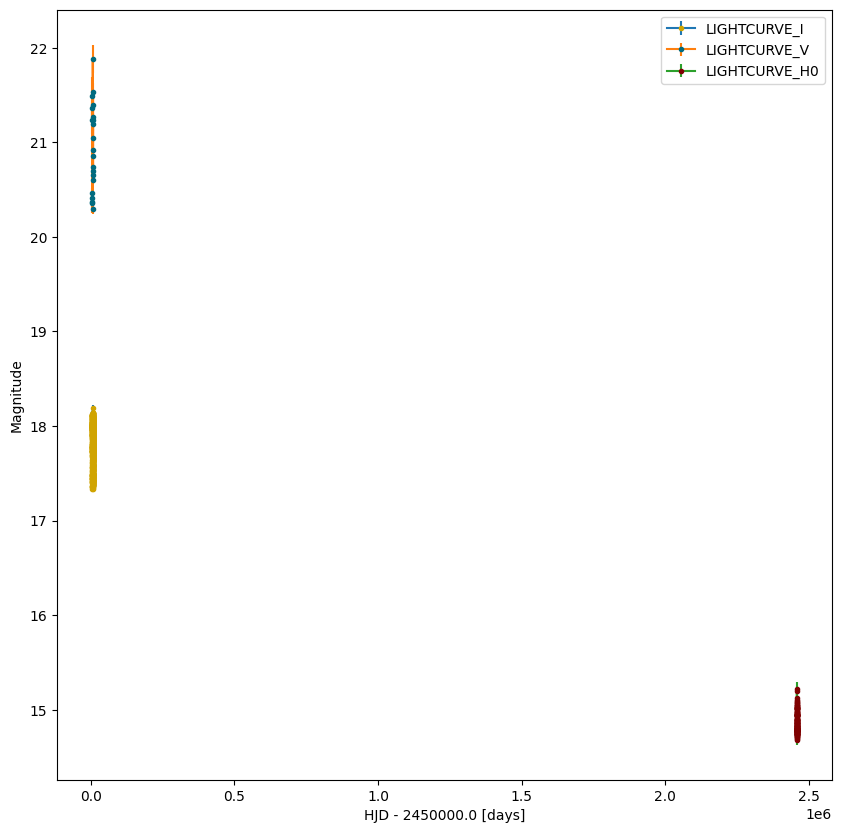

In [13]:
import matplotlib.pyplot as plt

colors = {'LIGHTCURVE_V': '#016B7F', 'LIGHTCURVE_I': '#D0A401', 'LIGHTCURVE_H0': '#7F0101'}

fig = plt.figure(1,(10,10))

for lc_name, lc in lightcurves.items():
    plt.errorbar(lc['HJD']-2450000.0, lc['mag'], yerr=lc['mag_error'],
                    mfc=colors[lc_name], mec=colors[lc_name], marker='.', label=lc_name)

plt.xlabel('HJD - 2450000.0 [days]')
plt.ylabel('Magnitude')
plt.legend()